In [1]:
# Import necessary libraries
import pandas as pd
import dask.dataframe as ddf


In [3]:

# Load the dataset
http_file_path = pd.read_csv('E:\Dataset\Computer Emergency Response Team (CERT) r6.2/r6.2/r6.2/http.csv')

In [5]:
# Display the first few rows of the http.csv dataset
print(http_file_path.head())

                         id                 date     user       pc  \
0  {V1D3-W8BL16YA-2594OWGB}  01/02/2010 06:21:31  ANC1950  PC-4921   
1  {C7A0-F6CK17IX-5508HGRY}  01/02/2010 06:21:42  ANC1950  PC-4921   
2  {C0X3-I5RZ16GM-1535IAMY}  01/02/2010 06:21:58  ANC1950  PC-4921   
3  {G8V6-M0CF17SO-9968THHW}  01/02/2010 06:28:04  ANC1950  PC-4921   
4  {I9A3-Z4JU92SK-7362XXPN}  01/02/2010 06:29:26  SAB1954  PC-5091   

                                                 url   activity  \
0  http://icio.us/John_Edward_Brownlee_as_Attorne...  WWW Visit   
1  http://babycenter.com/Manchester_SmallScale_Ex...  WWW Visit   
2  http://babycenter.com/Manchester_SmallScale_Ex...  WWW Visit   
3  http://timeanddate.com/Accurate_News_and_Infor...  WWW Visit   
4  http://timeanddate.com/Accurate_News_and_Infor...  WWW Visit   

                                             content  
0  Further consultation with post-production team...  
1  These two populations have been observed in ma...  
2  These tw

In [7]:
# Summary statistics for the numerical columns in the http.csv dataset
print(http_file_path.describe())

                              id                 date       user         pc  \
count                  117025216            117025216  117025216  117025216   
unique                 117025216             17658419       4000       4000   
top     {V1D3-W8BL16YA-2594OWGB}  03/25/2010 08:46:16    DMH0011    PC-3875   
freq                           1                  120     135945     135945   

                                                      url   activity  \
count                                           117025216  117025216   
unique                                            1602569          3   
top     http://feedburner.com/Bobby_Robson/dodgin/HFF_...  WWW Visit   
freq                                              1977836  115401178   

                                                  content  
count                                           117025216  
unique                                            1432664  
top     He had managed to survive with the help of sev...  
fre

In [10]:
# List the top 10 most visited URLs
top_urls = http_file_path['url'].value_counts().nlargest(10)
print("Top 10 most visited URLs:")
print(top_urls)

Top 10 most visited URLs:
http://feedburner.com/Bobby_Robson/dodgin/HFF_Arj_Vebafvqrfubyvqnlf1049160149.html              1977836
http://businessinsider.com/Chariot_racing/carceres/Onggyr_bs_Fnib_Vfynaqjrngure252880595.htm    1846902
http://constantcontact.com/Jack_Sheppard/blueskin/jbeyqfrevrf861921452.aspx                     1661301
http://people.com/Coenwulf_of_Mercia/wulfred/fhcreobjy1529142877.php                            1521630
http://cars.com/Byzantine_Empire/trebizond/Pveehf_pybhqfhcreobjy676959073.asp                   1504017
http://target.com/Battle_of_Taejon/kum/Gur_Zhzzl_1999_svyzarjf119806984.asp                     1487756
http://sprint.com/Charles_Eaton_RAAF_officer/eaton/snzvyl1079765765.htm                         1441715
http://discovercard.com/Brian_Eaton/eaton/Cresrpg_Qnexarjf79453780.html                         1295250
http://answers.com/Ellis_Paul/okemah/N_Ivaqvpngvba_bs_gur_Evtugf_bs_Zrasnzvyl2055572060.php     1234856
http://lockheedmartin.com/wbofrnepu163

In [12]:
# List the types of activities and their counts
activity_counts = http_file_path['activity'].value_counts()
print("Activity types and their counts:")
print(activity_counts)


Activity types and their counts:
WWW Visit       115401178
WWW Download      1413637
WWW Upload         210401
Name: activity, dtype: int64


In [13]:
# Print the top 5 most frequent content snippets
top_content = http_file_path['content'].value_counts().nlargest(5)
print("Top 5 most frequent content snippets:")
print(top_content)


Top 5 most frequent content snippets:
He had managed to survive with the help of several prisoners and was later a key witness at the Mauthausen-Gusen camp trials carried out by the Dachau International Military Tribunal. Out of all the main sub-camps of Mauthausen-Gusen only Gusen III was to be evacuated. Like nearby Mauthausen, the Gusen camp also used its inmates as slave labour in the granite quarries, but they also rented them out to various local businesses. In combat these shutters frequently cracked or broke when hit; rarely was a shutter jammed in either the open or closed position. A two-piece articulated rudder was fitted to New Ironsides, but it proved unsatisfactory in service as the ship became more unmanageable as her speed increased.                                                                                                                                                                                1977836
Photographer Annie Leibovitz took pictures of Knut that w

In [15]:
# List the top 5 users with the most unique URL visits
top_users = http_file_path.groupby('user')['url'].nunique().nlargest(5)
print("Top 5 users with the most unique URL visits:")
print(top_users)


Top 5 users with the most unique URL visits:
user
SDH2394    15610
CJH2330    14795
AEM0554    13687
BCM3794    13676
SAM3855    13227
Name: url, dtype: int64


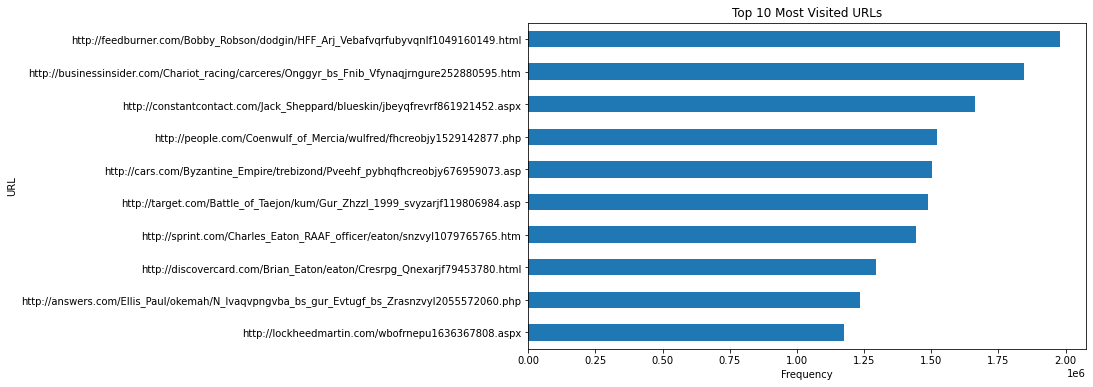

In [16]:
import matplotlib.pyplot as plt
# 1. Most Visited URLs

top_urls = http_file_path['url'].value_counts().nlargest(10)
top_urls.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Most Visited URLs')
plt.ylabel('URL')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()  # Invert y-axis to show the top URL first
plt.show()


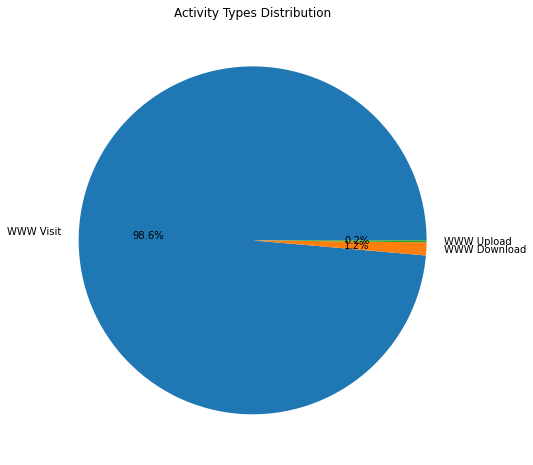

In [17]:
# 2. Activity Types

activity_counts = http_file_path['activity'].value_counts()
activity_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Activity Types Distribution')
plt.ylabel('')  # Hide the y-axis label
plt.show()


In [1]:
# 3. Top 5 Frequent Content Snippets

top_content = http_file_path['content'].value_counts().nlargest(5)
top_content.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Most Frequent Content Snippets')
plt.ylabel('Frequency')
plt.xlabel('Content Snippet Index')
plt.xticks(rotation=45, ha='right')
plt.show()


NameError: name 'http_file_path' is not defined

<module 'matplotlib.pyplot' from 'c:\\Users\\vinal\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

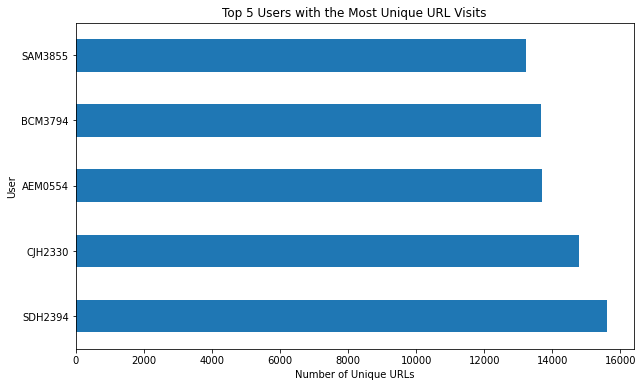

In [19]:
# 4. Users with the Most Unique URL Visits

top_users = http_file_path.groupby('user')['url'].nunique().nlargest(5)
top_users.plot(kind='barh', figsize=(10, 6))
plt.title('Top 5 Users with the Most Unique URL Visits')
plt.ylabel('User')
plt.xlabel('Number of Unique URLs')
plt


In [20]:
# Convert the 'date' column to datetime
http_file_path['date'] = pd.to_datetime(http_file_path['date'])

In [ ]:
import dask.dataframe as dd

# Read the data as a Dask DataFrame
http_file_path_dask = dd.read_csv('E:\Dataset\Computer Emergency Response Team (CERT) r6.2/r6.2/r6.2/http.csv')


In [ ]:

# Calculate session duration
http_file_path_dask['session_duration'] = http_file_path_dask.groupby('user')['date'].diff().dt.total_seconds()

In [ ]:

# Compute the result to bring it into memory (if needed)
result = http_file_path_dask.compute()

In [24]:
# Calculate the number of unique URLs accessed per session
http_file_path['unique_urls'] = http_file_path.groupby(['user', 'session_duration'])['url'].transform('nunique')

KeyError: 'session_duration'

In [26]:
# Preview the new features
print(http_file_path[['user', 'session_duration', 'unique_urls']].head())

KeyError: "['session_duration', 'unique_urls'] not in index"

In [27]:
# Assuming 'session_duration' is calculated and in seconds
session_duration_hours = http_file_path['session_duration'] / 3600

plt.figure(figsize=(10, 6))
session_duration_hours.plot(kind='hist', bins=50, density=True)
plt.title('Distribution of Session Duration (in hours)')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()


KeyError: 'session_duration'

In [28]:
# 2. Content Analysis

# Define suspicious keywords
suspicious_keywords = ['wikileaks', 'leak', 'unauthorized', 'hack']

In [29]:
# Create a feature that flags content containing suspicious keywords
http_file_path['suspicious_content'] = http_file_path['content'].apply(lambda x: any(keyword in x.lower() for keyword in suspicious_keywords))

In [30]:
# Preview the new feature
print(http_file_path[['user', 'url', 'suspicious_content']].head())

      user                                                url  \
0  ANC1950  http://icio.us/John_Edward_Brownlee_as_Attorne...   
1  ANC1950  http://babycenter.com/Manchester_SmallScale_Ex...   
2  ANC1950  http://babycenter.com/Manchester_SmallScale_Ex...   
3  ANC1950  http://timeanddate.com/Accurate_News_and_Infor...   
4  SAB1954  http://timeanddate.com/Accurate_News_and_Infor...   

   suspicious_content  
0               False  
1               False  
2               False  
3               False  
4               False  


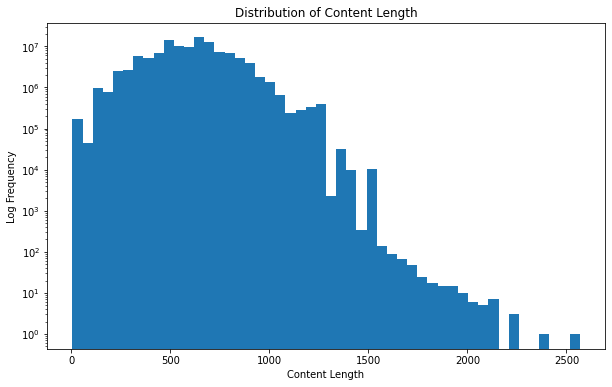

In [31]:
# Calculate content length
http_file_path['content_length'] = http_file_path['content'].apply(len)

plt.figure(figsize=(10, 6))
http_file_path['content_length'].plot(kind='hist', bins=50, logy=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Log Frequency')
plt.show()


In [39]:
# 3. Frequency Analysis

# Define suspicious domains
suspicious_domains = ['wikileaks.org', 'leaksite.com',]

In [40]:
# Create a feature that flags URLs containing suspicious domains
http_file_path['suspicious_url'] = http_file_path['url'].apply(lambda x: any(domain in x.lower() for domain in suspicious_domains))

MemoryError: Unable to allocate 893. MiB for an array with shape (117025216,) and data type object

In [ ]:
# Filter to only include rows with suspicious URLs
suspicious_urls_df = http_file_path[http_file_path['suspicious_url'] == True]

In [ ]:
# Preview the new feature
suspicious_urls_df = http_file_path[http_file_path['suspicious_url'] == True]


      user                                                url  suspicious_url
0  ANC1950  http://icio.us/John_Edward_Brownlee_as_Attorne...           False
1  ANC1950  http://babycenter.com/Manchester_SmallScale_Ex...           False
2  ANC1950  http://babycenter.com/Manchester_SmallScale_Ex...           False
3  ANC1950  http://timeanddate.com/Accurate_News_and_Infor...           False
4  SAB1954  http://timeanddate.com/Accurate_News_and_Infor...           False


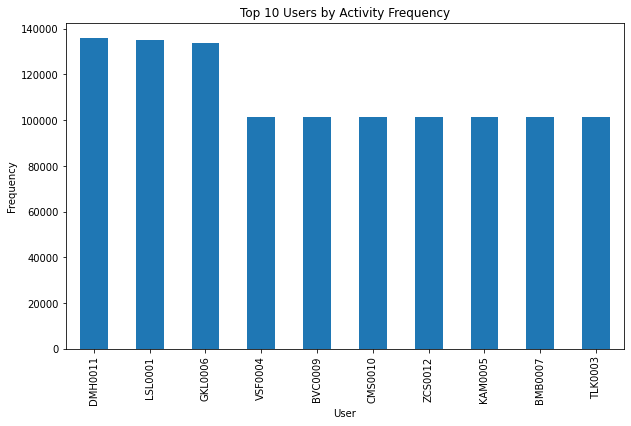

In [35]:
user_counts = http_file_path['user'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
user_counts.plot(kind='bar')
plt.title('Top 10 Users by Activity Frequency')
plt.xlabel('User')
plt.ylabel('Frequency')
plt.show()


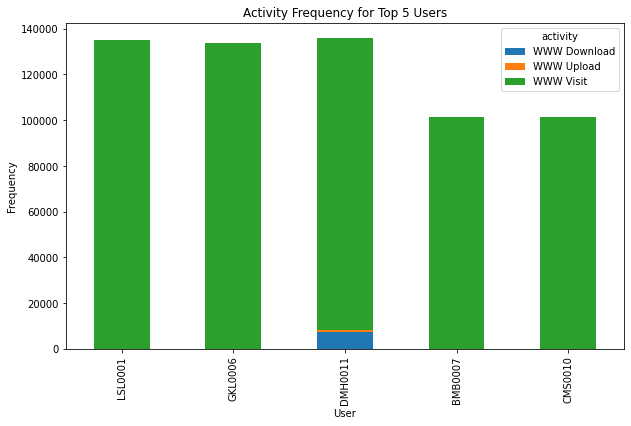

In [36]:
activity_per_user = http_file_path.groupby('user')['activity'].value_counts().unstack().fillna(0)

# Visualizing for top 5 users
activity_per_user.nlargest(5, 'WWW Visit').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Activity Frequency for Top 5 Users')
plt.xlabel('User')
plt.ylabel('Frequency')
plt.show()
